# From Bow to Word Embeddings

This file shows how different similarities across documents are calculated using BoW, SVD and Word2Vec.

In [20]:
# simple document set-up for testing

documents = [
    # Basic Data Terms
    "Data-driven decision-making is a key factor in business success",          
    "Predictive analytics and regression models help forecast outcomes in business",    

    # Emotional Language
    "Working with data gives me a sense of purpose and accomplishment",   
    "The thrill of uncovering insights from data gives me a sense of joy",         

    # Advanced Topics
    "Large-scale transformer models like BERT have changed natural language understanding",            
    "Large pretrained models like GPT push the boundaries of machine learning with human-like text generation"    
]


# BoW

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Create Bag of Words model
X = vectorizer.fit_transform(documents)

# Convert BoW to a DataFrame for better readability
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the BoW DataFrame
print(bow_df)

   accomplishment  analytics  and  bert  boundaries  business  changed  data  \
0               0          0    0     0           0         1        0     1   
1               0          1    1     0           0         1        0     0   
2               1          0    1     0           0         0        0     1   
3               0          0    0     0           0         0        0     1   
4               0          0    0     1           0         0        1     0   
5               0          0    0     0           1         0        0     0   

   decision  driven  ...  sense  success  text  the  thrill  transformer  \
0         1       1  ...      0        1     0    0       0            0   
1         0       0  ...      0        0     0    0       0            0   
2         0       0  ...      1        0     0    0       0            0   
3         0       0  ...      1        0     0    1       1            0   
4         0       0  ...      0        0     0    0       0

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(bow_df)

# Convert to DataFrame for better readability
cosine_sim_df = pd.DataFrame(cosine_sim, index=[f'Doc {i}' for i in range(len(bow_df))],
                             columns=[f'Doc {i}' for i in range(len(bow_df))])

# Display the Cosine Similarity DataFrame
print(cosine_sim_df)


          Doc 0     Doc 1     Doc 2     Doc 3     Doc 4     Doc 5
Doc 0  1.000000  0.200000  0.100000  0.084515  0.000000  0.000000
Doc 1  0.200000  1.000000  0.100000  0.000000  0.095346  0.074536
Doc 2  0.100000  0.100000  1.000000  0.507093  0.000000  0.149071
Doc 3  0.084515  0.000000  0.507093  1.000000  0.000000  0.188982
Doc 4  0.000000  0.095346  0.000000  0.000000  1.000000  0.284268
Doc 5  0.000000  0.074536  0.149071  0.188982  0.284268  1.000000


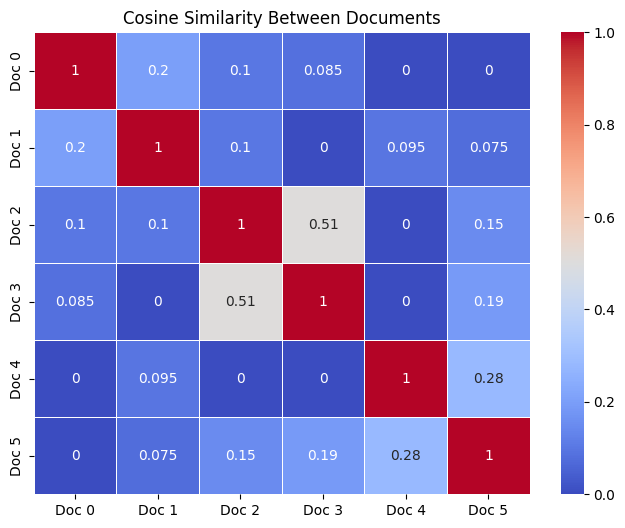

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim_df, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Cosine Similarity Between Documents')
plt.show()


# Vector space models (TF-IDF from Bow)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create TF-IDF matrix
X_tfidf = tfidf_vectorizer.fit_transform(documents)

# Convert TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df)


   accomplishment  analytics       and      bert  boundaries  business  \
0        0.000000   0.000000  0.000000  0.000000    0.000000  0.276048   
1        0.000000   0.343066  0.281319  0.000000    0.000000  0.281319   
2        0.369593   0.000000  0.303071  0.000000    0.000000  0.000000   
3        0.000000   0.000000  0.000000  0.000000    0.000000  0.000000   
4        0.000000   0.000000  0.000000  0.319046    0.000000  0.000000   
5        0.000000   0.000000  0.000000  0.000000    0.261126  0.000000   

    changed      data  decision    driven  ...     sense   success      text  \
0  0.000000  0.233059  0.336638  0.336638  ...  0.000000  0.336638  0.000000   
1  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2  0.000000  0.255874  0.000000  0.000000  ...  0.303071  0.000000  0.000000   
3  0.000000  0.217991  0.000000  0.000000  ...  0.258201  0.000000  0.000000   
4  0.319046  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
5

In [26]:

# Calculate the cosine similarity matrix based on the TF-IDF DataFrame
cosine_sim_tfidf = cosine_similarity(tfidf_df)

# Convert to DataFrame for better readability
cosine_sim_df_tfidf = pd.DataFrame(cosine_sim_tfidf, index=[f'Doc {i}' for i in range(len(tfidf_df))],
                             columns=[f'Doc {i}' for i in range(len(tfidf_df))])

# Display the Cosine Similarity DataFrame
print(cosine_sim_df_tfidf)


          Doc 0     Doc 1     Doc 2     Doc 3     Doc 4     Doc 5
Doc 0  1.000000  0.155316  0.059634  0.050805  0.000000  0.000000
Doc 1  0.155316  1.000000  0.085260  0.000000  0.052461  0.042937
Doc 2  0.059634  0.085260  1.000000  0.402095  0.000000  0.111153
Doc 3  0.050805  0.000000  0.402095  1.000000  0.000000  0.134105
Doc 4  0.000000  0.052461  0.000000  0.000000  1.000000  0.207992
Doc 5  0.000000  0.042937  0.111153  0.134105  0.207992  1.000000


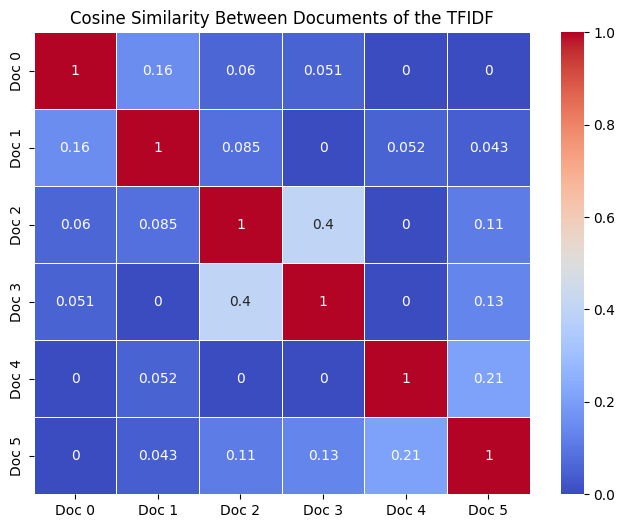

In [27]:

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim_df_tfidf, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Cosine Similarity Between Documents of the TFIDF')
plt.show()


# SVD and LSA

In [28]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert documents to TF-IDF matrix
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

# Apply Truncated SVD (LSA)
n_components = 6  # Number of topics
svd = TruncatedSVD(n_components=n_components)
lsa = svd.fit_transform(X)

# Get the words associated with each topic
terms = vectorizer.get_feature_names_out()

for i, topic in enumerate(svd.components_):
    print(f"Topic {i+1}:")

    # Get the top 10 positive words with their coefficients
    top_positive = [(terms[j], topic[j]) for j in topic.argsort()[-10:]]  # Highest values
    print("Positive Associations:")
    for word, value in top_positive:
        print(f"{word}: {value:.4f}")  # Display word and its coefficient

    # Get the top 10 negative words with their coefficients
    top_negative = [(terms[j], topic[j]) for j in topic.argsort()[:10]]   # Lowest values
    print("\nNegative Associations:")
    for word, value in top_negative:
        print(f"{word}: {value:.4f}")  # Display word and its coefficient

    print("\n")

# Display full document-topic matrix
lsa_df = pd.DataFrame(lsa, columns=[f"Topic {i+1}" for i in range(n_components)])
print("\nDocument-Topic Matrix:")
print(lsa_df)

# Display explained variance (dimension weights)
print("\nExplained Variance (Weights) for each Topic:")
explained_variance = svd.explained_variance_ratio_
for i, weight in enumerate(explained_variance):
    print(f"Topic {i+1} weight: {weight}")

Topic 1:
Positive Associations:
purpose: 0.1847
working: 0.1847
the: 0.1929
and: 0.2000
with: 0.2178
data: 0.2718
sense: 0.2780
me: 0.2780
gives: 0.2780
of: 0.3975

Negative Associations:
transformer: 0.0458
natural: 0.0458
understanding: 0.0458
bert: 0.0458
language: 0.0458
scale: 0.0458
changed: 0.0458
have: 0.0458
key: 0.0536
success: 0.0536


Topic 2:
Positive Associations:
understanding: 0.2122
transformer: 0.2122
have: 0.2122
changed: 0.2122
scale: 0.2122
natural: 0.2122
language: 0.2122
large: 0.2762
models: 0.2776
like: 0.3784

Negative Associations:
sense: -0.1554
me: -0.1554
gives: -0.1554
data: -0.1334
of: -0.1063
accomplishment: -0.1009
purpose: -0.1009
working: -0.1009
uncovering: -0.0887
thrill: -0.0887


Topic 3:
Positive Associations:
analytics: 0.2105
key: 0.2156
making: 0.2156
factor: 0.2156
is: 0.2156
driven: 0.2156
decision: 0.2156
success: 0.2156
in: 0.3494
business: 0.3494

Negative Associations:
of: -0.1374
like: -0.1237
the: -0.0952
large: -0.0762
sense: -0.0676

Maybe

**Topic 1: Data-Driven Fulfillment and Purpose**

Positive Associations: purpose, working, sense, gives, data
Negative Associations: transformer, natural language, understanding, bert, scale


**Topic 2: Natural Language Processing and Transformer Models**

Positive Associations: understanding, transformer, bert, natural, language
Negative Associations: sense, purpose, data, thrill, accomplishment

**Topic 3: Data-Driven Business Strategy**

Positive Associations: analytics, decision, success, driven, business
Negative Associations: sense, thrill, joy, uncovering, purpose

**Topic 4: Large-Scale Data and Business Decision-Making**

Positive Associations: large, data, success, factor, decision
Negative Associations: regression, predictive, analytics, forecast, models

**Topic 5: GPT Models and Text Generation**

Positive Associations: gpt, generation, learning, text, boundaries
Negative Associations: understanding, transformer, natural, bert, language

**Topic 6: Predictive Analytics and Insight Discovery**

Positive Associations: regression, analytics, uncovering, insights, joy
Negative Associations: working, purpose, accomplishment, data, sense

In [29]:
sorted_variance = sorted(zip(range(1, n_components + 1), explained_variance), key=lambda x: x[1], reverse=True)
for topic, weight in sorted_variance:
    print(f"Topic {topic} weight: {weight}")

Topic 3 weight: 0.2260552116997526
Topic 2 weight: 0.22591700552582988
Topic 4 weight: 0.18401618231573746
Topic 5 weight: 0.1672872423415611
Topic 6 weight: 0.12843495723915402
Topic 1 weight: 0.06828940087796437



Cosine Similarity Matrix (SVD Document-Topic):
              Doc 1         Doc 2         Doc 3         Doc 4         Doc 5  \
Doc 1  1.000000e+00  1.553155e-01  5.963365e-02  5.080479e-02 -2.596721e-16   
Doc 2  1.553155e-01  1.000000e+00  8.525984e-02 -2.652058e-16  5.246083e-02   
Doc 3  5.963365e-02  8.525984e-02  1.000000e+00  4.020946e-01  1.010706e-16   
Doc 4  5.080479e-02 -2.652058e-16  4.020946e-01  1.000000e+00 -2.713981e-16   
Doc 5 -2.596721e-16  5.246083e-02  1.010706e-16 -2.713981e-16  1.000000e+00   
Doc 6  3.039597e-17  4.293715e-02  1.111530e-01  1.341052e-01  2.079920e-01   

              Doc 6  
Doc 1  3.039597e-17  
Doc 2  4.293715e-02  
Doc 3  1.111530e-01  
Doc 4  1.341052e-01  
Doc 5  2.079920e-01  
Doc 6  1.000000e+00  


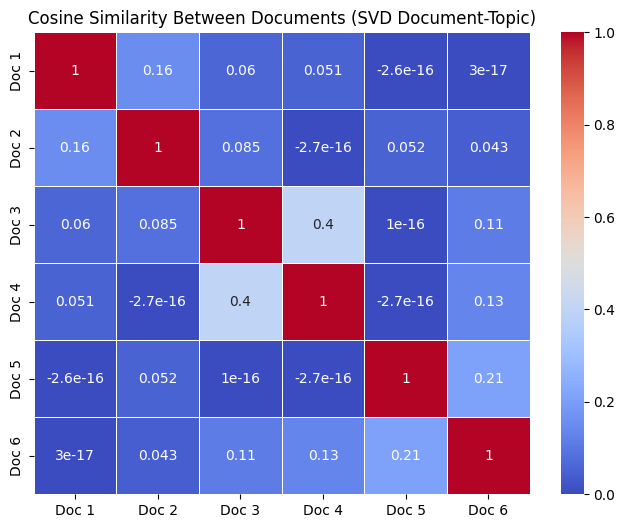

In [30]:
# Calculate cosine similarity on the document-topic matrix
cosine_sim_svd = cosine_similarity(lsa_df)

# Convert to a DataFrame for better visualization
cosine_sim_df_svd = pd.DataFrame(cosine_sim_svd, index=[f"Doc {i+1}" for i in range(lsa_df.shape[0])],
                                 columns=[f"Doc {i+1}" for i in range(lsa_df.shape[0])])

# Display cosine similarity matrix (document-to-document based on SVD)
print("\nCosine Similarity Matrix (SVD Document-Topic):")
print(cosine_sim_df_svd)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim_df_svd, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Cosine Similarity Between Documents (SVD Document-Topic)')
plt.show()

# Word2Vec

In [40]:
import nltk
from nltk.tokenize import word_tokenize

# Download the tokenizer models
nltk.download('punkt')

# Tokenize the documents
tokenized_documents = [word_tokenize(doc.lower()) for doc in documents]


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lisalechner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
from gensim.models import Word2Vec

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_documents, vector_size=100, window=5, min_count=0, workers=4)


In [33]:
# List all the words in the Word2Vec model's vocabulary
vocab_words = list(word2vec_model.wv.key_to_index.keys())

# Print the number of words in the vocabulary
print(f"Number of words in the model: {len(vocab_words)}")

# Display the first 10 words in the vocabulary (for example)
print(f"Sample words in the model: {vocab_words[:40]}")

Number of words in the model: 51
Sample words in the model: ['of', 'a', 'models', 'sense', 'like', 'the', 'me', 'gives', 'data', 'in', 'business', 'with', 'and', 'working', 'outcomes', 'forecast', 'generation', 'help', 'analytics', 'predictive', 'success', 'factor', 'key', 'is', 'decision-making', 'regression', 'accomplishment', 'purpose', 'text', 'human-like', 'learning', 'machine', 'boundaries', 'push', 'gpt', 'pretrained', 'large', 'understanding', 'language', 'natural']


Explanation of Parameters:
- sentences: The tokenized documents that you are using to train the model.
- vector_size: The number of dimensions for the word embeddings.
- window: The maximum distance between the current and predicted word (i.e., how many words to the left and right to consider as context).
- min_count: Ignores words that appear less than this number of times.
- workers: The number of threads to use for training.

In [36]:
# Get the word vector for a specific word
vector = word2vec_model.wv['models']
print("Vector for 'models':", vector)

# Find similar words to a given word
similar_words = word2vec_model.wv.most_similar('models', topn=5)
print("Words most similar to 'models':", similar_words)


Vector for 'models': [ 8.7465516e-05  3.0715829e-03 -6.8239379e-03 -1.3772795e-03
  7.6645324e-03  7.3409048e-03 -3.6847047e-03  2.6534856e-03
 -8.3120884e-03  6.1996356e-03 -4.6340809e-03 -3.1674309e-03
  9.3063209e-03  8.8059058e-04  7.4951285e-03 -6.0781292e-03
  5.1624496e-03  9.9238865e-03 -8.4542464e-03 -5.1484457e-03
 -7.0603471e-03 -4.8643700e-03 -3.7721545e-03 -8.5398415e-03
  7.9671778e-03 -4.8472849e-03  8.4254071e-03  5.2668094e-03
 -6.5553375e-03  3.9647594e-03  5.4765628e-03 -7.4308240e-03
 -7.3934896e-03 -2.4929810e-03 -8.6264024e-03 -1.5850762e-03
 -4.0565987e-04  3.2995946e-03  1.4402757e-03 -8.8497426e-04
 -5.5991937e-03  1.7332054e-03 -9.0454629e-04  6.7876782e-03
  3.9749658e-03  4.5177960e-03  1.4375071e-03 -2.6982343e-03
 -4.3613953e-03 -1.0229285e-03  1.4393821e-03 -2.6496171e-03
 -7.0736376e-03 -7.8001576e-03 -9.1169430e-03 -5.9348592e-03
 -1.8411115e-03 -4.3242387e-03 -6.4689866e-03 -3.7118623e-03
  4.2855847e-03 -3.7391693e-03  8.3875526e-03  1.5388831e-03
 -7

### use pretrained data

In [42]:
import gensim.downloader as api
import gensim

# Load the pretrained Word2Vec model
model = api.load('word2vec-google-news-300')

# Check the size of the vocabulary
print(f"Vocabulary size: {len(model.key_to_index)}")

Vocabulary size: 3000000


In [43]:
# Example: Get the vector for a word
vector = model['models']
print(f"Vector for 'models': {vector}")

# Find similar words
similar_words = model.most_similar('models', topn=5)
print(f"Words most similar to 'models': {similar_words}")


Vector for 'models': [ 0.20214844  0.24414062  0.12158203  0.27148438 -0.01782227 -0.03955078
  0.20996094 -0.29492188 -0.07080078  0.15527344  0.13085938 -0.02905273
  0.07128906 -0.2421875  -0.03662109  0.15234375  0.17480469  0.16308594
 -0.05175781 -0.24902344 -0.01184082 -0.25390625 -0.33984375 -0.04321289
  0.06689453  0.12988281 -0.39257812  0.18847656  0.09521484 -0.25195312
 -0.02722168  0.09472656 -0.10839844  0.46484375  0.046875   -0.22460938
  0.03417969  0.10009766  0.02319336 -0.14550781 -0.0201416   0.08886719
 -0.16699219  0.16699219  0.203125    0.06542969 -0.20507812 -0.00063705
  0.34960938  0.12597656 -0.04077148 -0.13476562 -0.26171875  0.00717163
  0.00540161 -0.08349609  0.07373047 -0.16308594 -0.02441406 -0.16992188
 -0.02819824  0.17675781 -0.28125    -0.11865234  0.04370117  0.18457031
  0.16503906  0.45117188 -0.05297852  0.19824219  0.03295898 -0.02197266
  0.12158203  0.03833008 -0.08740234  0.03515625 -0.08691406  0.00964355
  0.07080078 -0.02624512  0.11

In [44]:
# Save the pretrained model locally (I do not want to load it again)
model.save('word2vec-google-news-300.model')

# Load the saved model
loaded_model = gensim.models.KeyedVectors.load('word2vec-google-news-300.model')


In [50]:
# List to hold document vectors
document_vectors = []

# Iterate over each document
for doc in tokenized_documents:
    word_vectors = []

    # For each word in the document, check if it exists in the pretrained model
    for word in doc:
        if word in loaded_model.key_to_index:  # Check if word exists in pretrained vocab
            word_vectors.append(loaded_model[word])

    # If we have any valid word vectors, calculate the average vector for the document
    if word_vectors:
        avg_vector = sum(word_vectors) / len(word_vectors)
        document_vectors.append(avg_vector)
    else:
        # Handle cases where no valid word vectors are found
        document_vectors.append(None)

# Now, `document_vectors` holds the average vector for each document
print(document_vectors)

[array([ 6.76015243e-02, -2.54160557e-02,  8.54492188e-04, -3.11686192e-02,
       -1.79036462e-03,  2.85034180e-02,  3.07312012e-02, -8.61002579e-02,
        1.36515304e-01,  1.10178627e-01, -2.36714687e-02, -7.58565292e-02,
        1.12955727e-01,  1.24511719e-02, -9.00065079e-02,  8.28450546e-02,
        9.38313827e-02, -1.79036462e-03, -4.01611328e-02, -1.06445312e-01,
       -1.07991539e-01,  7.50325546e-02, -7.45188370e-02,  7.35066757e-02,
        3.46679688e-02,  4.19311523e-02, -8.05028304e-02,  4.35791016e-02,
       -3.33658862e-03,  6.11572266e-02,  1.26139328e-01, -1.40055344e-01,
        8.35978165e-02, -1.48518884e-03,  8.95589218e-02,  8.82975236e-02,
       -6.58365861e-02,  7.85318986e-02,  8.82720947e-02, -9.98942088e-03,
        1.62272140e-01,  1.37939453e-02, -7.99357072e-02,  9.36889648e-02,
       -5.25919609e-02, -9.24110413e-02,  1.23901367e-02,  3.43500786e-02,
        6.05875663e-02,  1.10270180e-01,  1.61539707e-02,  8.17464218e-02,
       -3.69466133e-02, 

In [49]:
# now let's calculate the similarities of documents (how well do we do?)
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have two document vectors from `document_vectors`
doc1_vector = document_vectors[0]
doc2_vector = document_vectors[1]

# Compute cosine similarity
similarity = cosine_similarity([doc1_vector], [doc2_vector])
print(f"Cosine similarity between doc1 and doc2: {similarity[0][0]}")


Cosine similarity between doc1 and doc2: 0.43390050530433655



Cosine Similarity Matrix:
          Doc 1     Doc 2     Doc 3     Doc 4     Doc 5     Doc 6
Doc 1  1.000000  0.433901  0.474278  0.410977  0.346320  0.345922
Doc 2  0.433901  1.000000  0.374932  0.426410  0.428854  0.490965
Doc 3  0.474278  0.374932  1.000000  0.750329  0.416045  0.453971
Doc 4  0.410977  0.426410  0.750329  1.000000  0.402608  0.433919
Doc 5  0.346320  0.428854  0.416045  0.402608  1.000000  0.543293
Doc 6  0.345922  0.490965  0.453971  0.433919  0.543293  1.000000


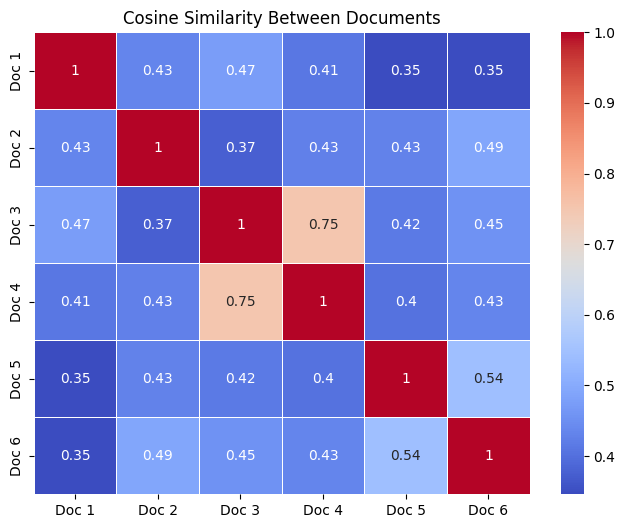

In [51]:
# Calculate the cosine similarity between all document vectors
similarity_matrix = cosine_similarity(document_vectors)

# Create a DataFrame for better visualization
similarity_df = pd.DataFrame(similarity_matrix, 
                             index=[f"Doc {i+1}" for i in range(len(document_vectors))],
                             columns=[f"Doc {i+1}" for i in range(len(document_vectors))])

# Display the cosine similarity matrix
print("\nCosine Similarity Matrix:")
print(similarity_df)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_df, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Cosine Similarity Between Documents')
plt.show()
